# 📘 Istio Performance Analysis
This notebook includes visualizations and insights based on configuration and metrics data from an Istio service mesh test.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../result/t2-stepup.csv")

# Derived metrics
df['latency_per_rps'] = df['avg_latency_ms'] / df['rps_user'].replace(0, np.nan)
df['cpu_per_rps'] = df['envoy_cpu_cores'] / df['rps_user'].replace(0, np.nan)
df['mem_per_rps'] = df['envoy_mem_bytes'] / df['rps_user'].replace(0, np.nan)
df['bandwidth_ratio'] = df['outbond_bandwidth'] / df['inbond_bandwidth'].replace(0, np.nan)
df['load_efficiency_score'] = (df['success_rate'] / df['avg_latency_ms']) * df['rps_user']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['latency_per_rps'], inplace=True)


## 📊 Latency per RPS vs RPS

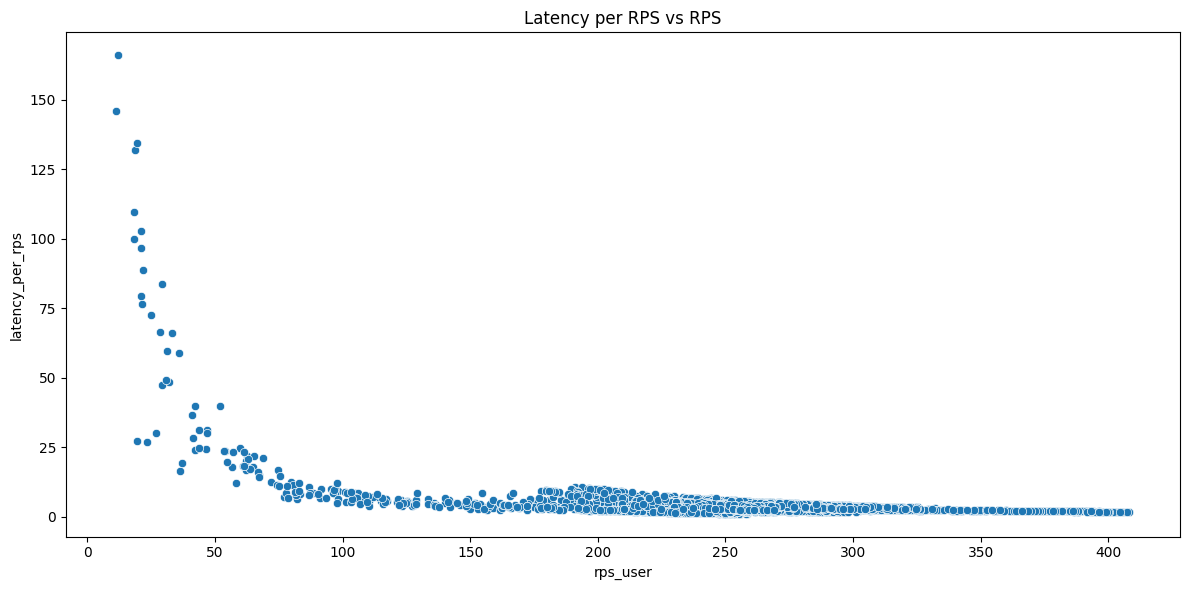

In [2]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rps_user', y='latency_per_rps')
plt.title("Latency per RPS vs RPS")
plt.tight_layout()
plt.show()


## 📊 Load Efficiency Score Over Time

KeyError: 'x'

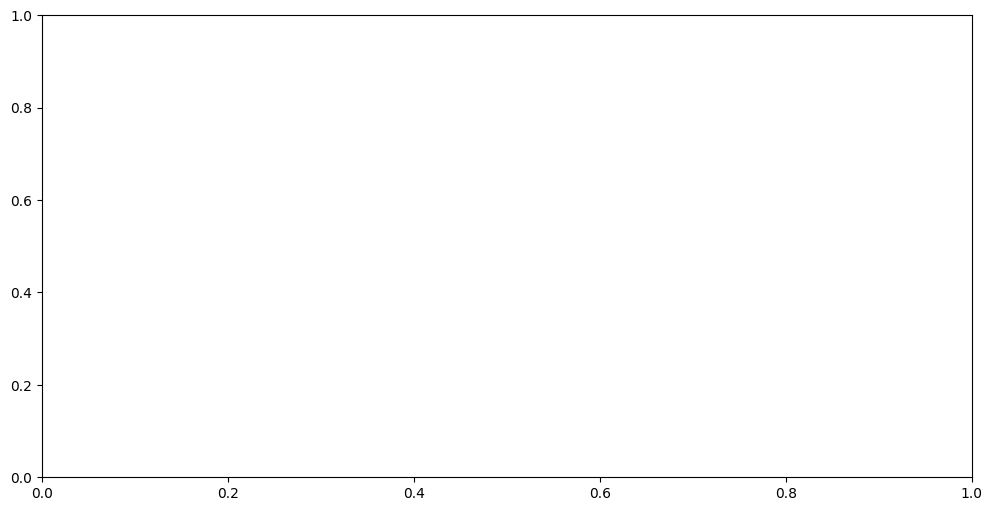

In [3]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, y='load_efficiency_score')
plt.title("Load Efficiency Score Over Time")
plt.tight_layout()
plt.show()


## 📊 Bandwidth Ratio vs Avg Latency

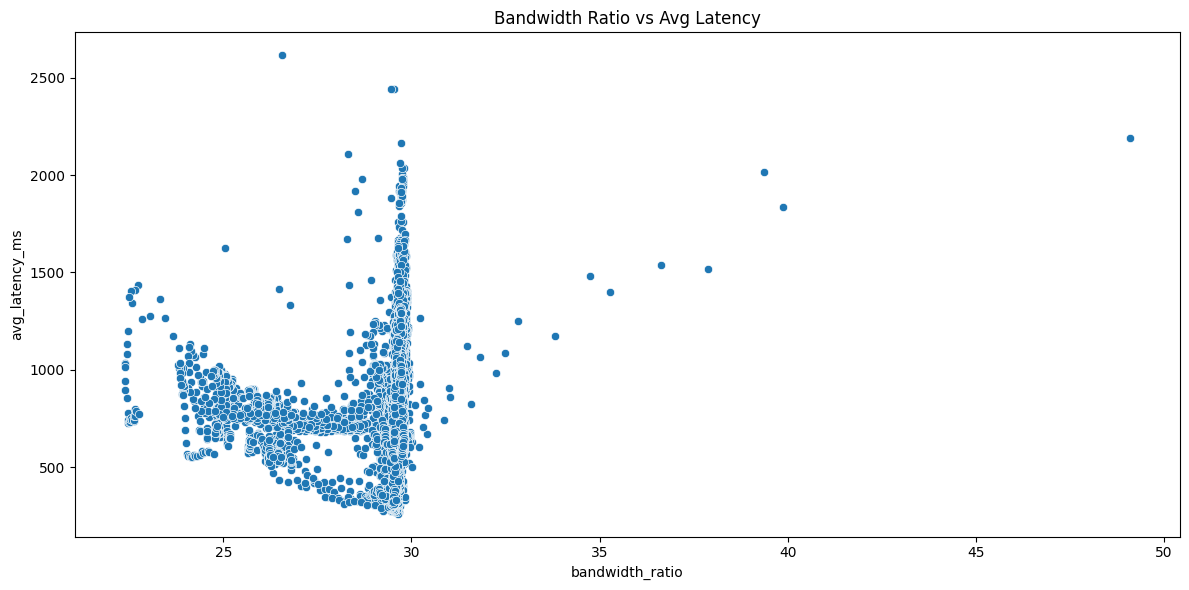

In [4]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='bandwidth_ratio', y='avg_latency_ms')
plt.title("Bandwidth Ratio vs Avg Latency")
plt.tight_layout()
plt.show()


## 📊 CPU per RPS vs Success Rate

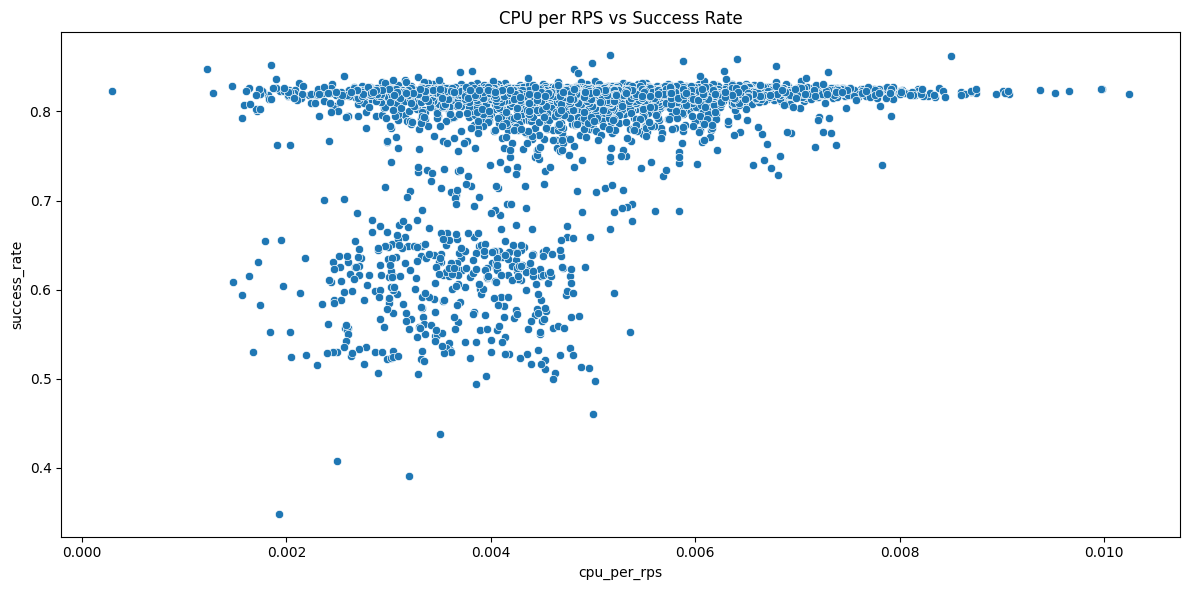

In [5]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='cpu_per_rps', y='success_rate')
plt.title("CPU per RPS vs Success Rate")
plt.tight_layout()
plt.show()


## 🧪 Latency per RPS vs RPS Colored by retry_attempts

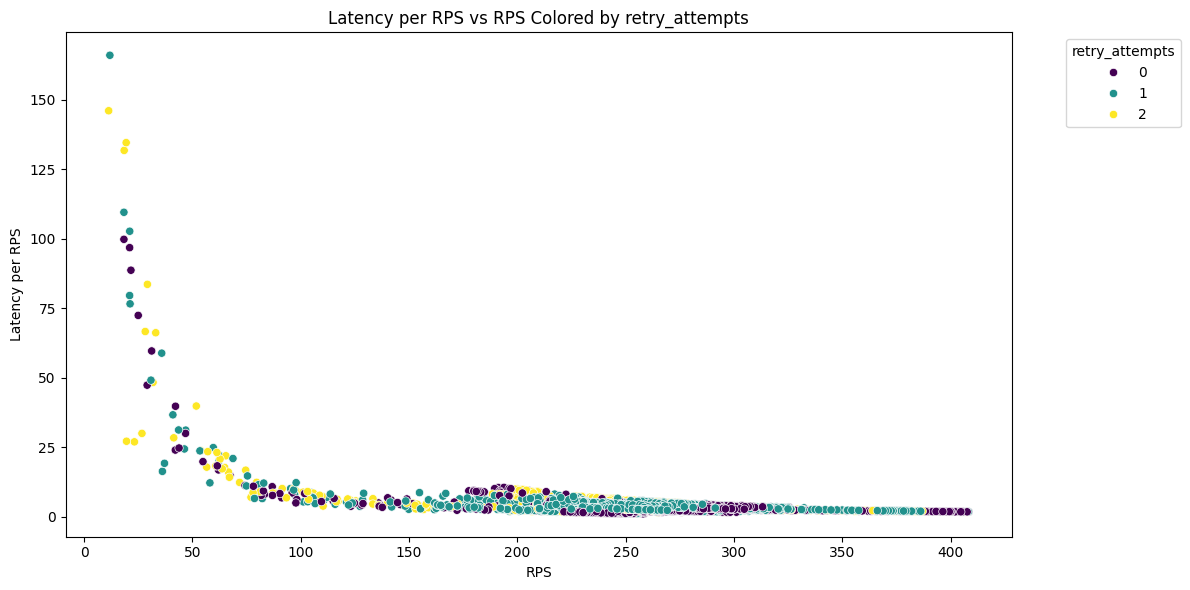

In [6]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rps_user', y='latency_per_rps', hue='retry_attempts', palette='viridis')
plt.title("Latency per RPS vs RPS Colored by retry_attempts")
plt.xlabel("RPS")
plt.ylabel("Latency per RPS")
plt.legend(title="retry_attempts", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🧪 Latency per RPS vs RPS Colored by timeout_sec

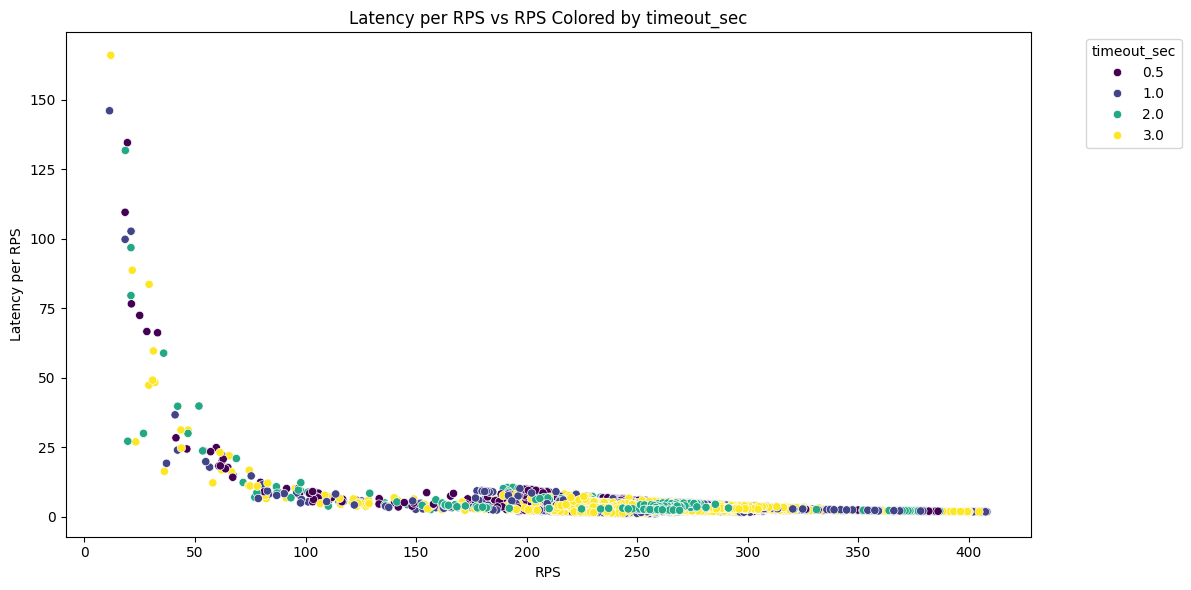

In [7]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rps_user', y='latency_per_rps', hue='timeout_sec', palette='viridis')
plt.title("Latency per RPS vs RPS Colored by timeout_sec")
plt.xlabel("RPS")
plt.ylabel("Latency per RPS")
plt.legend(title="timeout_sec", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🧪 Latency per RPS vs RPS Colored by http1MaxPendingRequests

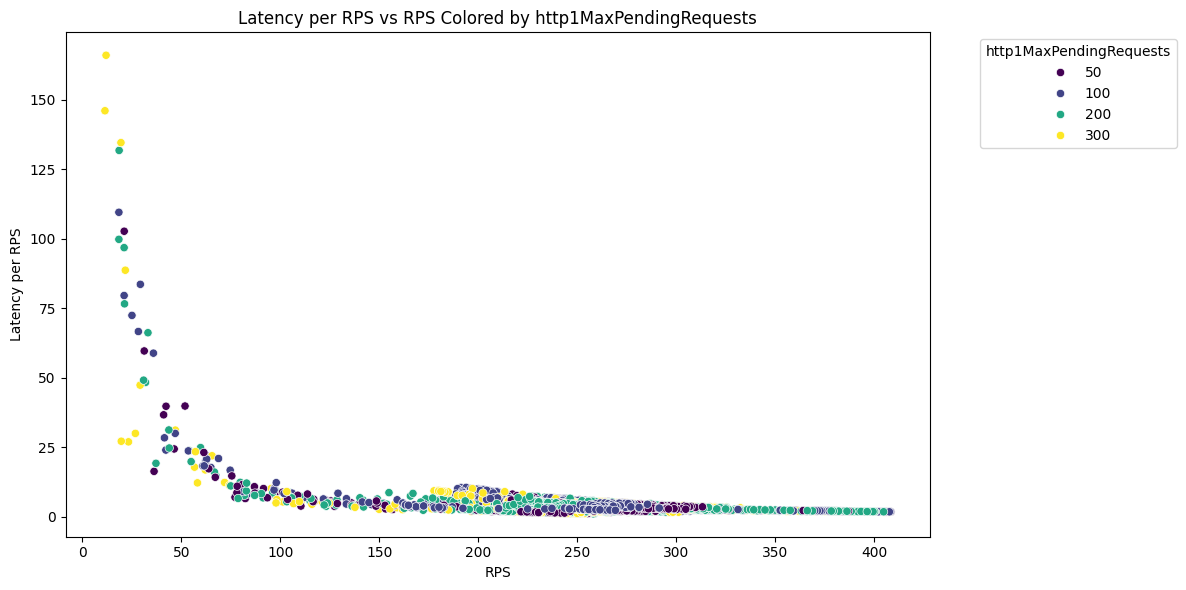

In [8]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rps_user', y='latency_per_rps', hue='http1MaxPendingRequests', palette='viridis')
plt.title("Latency per RPS vs RPS Colored by http1MaxPendingRequests")
plt.xlabel("RPS")
plt.ylabel("Latency per RPS")
plt.legend(title="http1MaxPendingRequests", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 🧪 Latency per RPS vs RPS Colored by http2MaxRequests

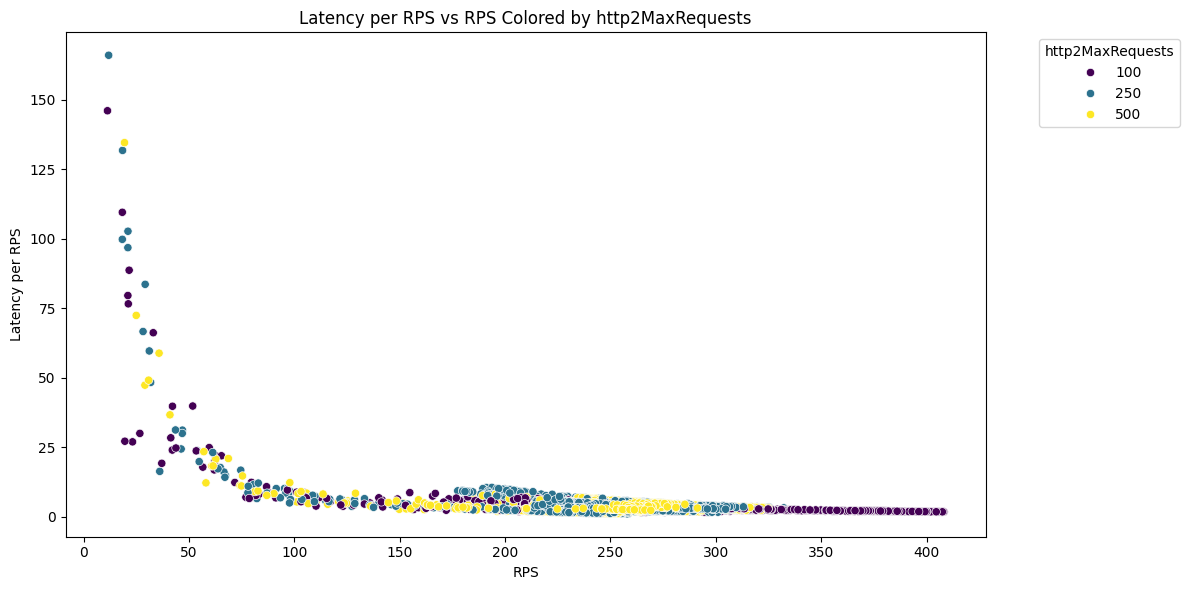

In [9]:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rps_user', y='latency_per_rps', hue='http2MaxRequests', palette='viridis')
plt.title("Latency per RPS vs RPS Colored by http2MaxRequests")
plt.xlabel("RPS")
plt.ylabel("Latency per RPS")
plt.legend(title="http2MaxRequests", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
